In [1]:
import os
os.chdir('../../')

import DeepPurpose.DTI as models
from DeepPurpose.utils import *
from DeepPurpose.dataset import *
import Processing.dataset_filter as processors

if not os.path.exists('./result/DeepDTA'):
    os.makedirs('./result/DeepDTA')

In [2]:
df = pd.read_csv('./data/r2/title_r2_1.25k.csv', sep = ',', error_bad_lines=False)
X_drug, X_target, y = df['Drug'].values, df['Target'].values, df['Label'].values

drug_encoding = 'CNN'
target_encoding = 'CNN'
train, val, test = data_process(X_drug, X_target, y,
                                drug_encoding, target_encoding,
                                split_method='random',frac=[0.7,0.1,0.2])

# use the parameters setting provided in the paper: https://arxiv.org/abs/1801.10193
config = generate_config(drug_encoding = drug_encoding,
                         target_encoding = target_encoding,
                         cls_hidden_dims = [1024,1024,512],
                         train_epoch = 100,
                         LR = 0.001,
                         batch_size = 256,
                         cnn_drug_filters = [32,64,96],
                         cnn_target_filters = [32,64,96],
                         cnn_drug_kernels = [4,6,8],
                         cnn_target_kernels = [4,8,12]
                         )


Drug Target Interaction Prediction Mode...
in total: 1250 drug-target pairs
encoding drug...
unique drugs: 1235
encoding protein...
unique target sequence: 476
splitting dataset...
Done.


Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 51.5125. Total time 0.00055 hours
Validation at Epoch 1 with loss:14.7321, MSE: 14.7321 , Pearson Correlation: 0.16360 with p-value: 6.83E-02 , Concordance Index: 0.55195
Training at Epoch 2 iteration 0 with loss 14.6297. Total time 0.00222 hours
Validation at Epoch 2 with loss:3.16582, MSE: 3.16582 , Pearson Correlation: 0.16966 with p-value: 5.86E-02 , Concordance Index: 0.55130
Training at Epoch 3 iteration 0 with loss 3.26695. Total time 0.00388 hours
Validation at Epoch 3 with loss:10.9944, MSE: 10.9944 , Pearson Correlation: 0.15666 with p-value: 8.10E-02 , Concordance Index: 0.53450
Training at Epoch 4 iteration 0 with loss 10.8493. Total time 0.00583 hours
Validation at Epoch 4 with loss:2.79545, MSE: 2.79545 , Pearson Correlation: 0.15126 with p-value: 9.22E-02 , Concordance Index: 0.52791
Training at Epoch 5 iteration 0 with loss 2.73309. Total time 0.0075 hours
Validat

Training at Epoch 39 iteration 0 with loss 1.73259. Total time 0.06444 hours
Validation at Epoch 39 with loss:1.87072, MSE: 1.87072 , Pearson Correlation: 0.35519 with p-value: 4.81E-05 , Concordance Index: 0.61527
Training at Epoch 40 iteration 0 with loss 1.96483. Total time 0.06638 hours
Validation at Epoch 40 with loss:1.87001, MSE: 1.87001 , Pearson Correlation: 0.35189 with p-value: 5.71E-05 , Concordance Index: 0.61592
Training at Epoch 41 iteration 0 with loss 1.88990. Total time 0.06805 hours
Validation at Epoch 41 with loss:1.84014, MSE: 1.84014 , Pearson Correlation: 0.35751 with p-value: 4.26E-05 , Concordance Index: 0.61747
Training at Epoch 42 iteration 0 with loss 1.88977. Total time 0.06972 hours
Validation at Epoch 42 with loss:1.83744, MSE: 1.83744 , Pearson Correlation: 0.36095 with p-value: 3.54E-05 , Concordance Index: 0.61889
Training at Epoch 43 iteration 0 with loss 1.71975. Total time 0.07138 hours
Validation at Epoch 43 with loss:1.84175, MSE: 1.84175 , Pearso

Validation at Epoch 77 with loss:2.28692, MSE: 2.28692 , Pearson Correlation: 0.38535 with p-value: 9.09E-06 , Concordance Index: 0.63298
Training at Epoch 78 iteration 0 with loss 0.72727. Total time 0.13194 hours
Validation at Epoch 78 with loss:2.09255, MSE: 2.09255 , Pearson Correlation: 0.37504 with p-value: 1.64E-05 , Concordance Index: 0.62910
Training at Epoch 79 iteration 0 with loss 0.39380. Total time 0.13361 hours
Validation at Epoch 79 with loss:2.07402, MSE: 2.07402 , Pearson Correlation: 0.37816 with p-value: 1.37E-05 , Concordance Index: 0.62794
Training at Epoch 80 iteration 0 with loss 0.30482. Total time 0.13555 hours
Validation at Epoch 80 with loss:2.08904, MSE: 2.08904 , Pearson Correlation: 0.38419 with p-value: 9.72E-06 , Concordance Index: 0.63168
Training at Epoch 81 iteration 0 with loss 0.32351. Total time 0.13722 hours
Validation at Epoch 81 with loss:2.18893, MSE: 2.18893 , Pearson Correlation: 0.38398 with p-value: 9.84E-06 , Concordance Index: 0.63220
Tr

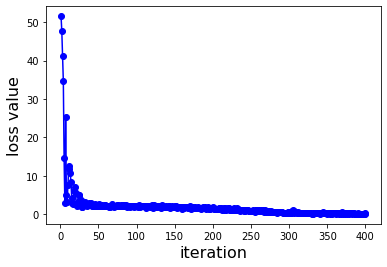

In [3]:
model = models.model_initialize(**config)
model.train(train, val, test)

In [4]:
model.save_model('./result/DeepDTA/r2/model_r2_1.25k_100epochs')